In [277]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import random

# Suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

1. Batting: `batting_data.csv`
3. Player Name and ID Map: `player_team_name_id.csv`

In [278]:
batting_df = pd.read_csv("final_data/batting_data.csv")
batting_df

,player_id,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,odi_number
0,440970,0,-,3,0,0,0.00,3,caught,2,Kenya,Sharjah,2 Oct 2013,ODI # 3417
1,440970,13*,-,19,0,0,68.42,5,not out,2,Kenya,Sharjah,4 Oct 2013,ODI # 3418
2,440970,38*,-,67,4,0,56.71,4,not out,2,Hong Kong,Kuala Lumpur,1 May 2014,ODI # 3487
3,440970,3,-,7,0,0,42.85,4,lbw,1,U.A.E.,Kuala Lumpur,2 May 2014,ODI # 3488
4,440970,15,21,22,2,0,68.18,4,caught,1,Zimbabwe,Bulawayo,18 Jul 2014,ODI # 3503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,4*,4,2,1,0,200.00,11,not out,2,South Africa,Delhi,7 Oct 2023,ODI # 4661
9327,793007,DNB,-,-,-,-,-,-,-,1,Pakistan,Hyderabad,10 Oct 2023,ODI # 4665
9328,793007,0*,12,6,0,0,0.00,11,not out,1,Australia,Lucknow,16 Oct 2023,ODI # 4671
9329,793007,DNB,-,-,-,-,-,-,-,2,Netherlands,Lucknow,21 Oct 2023,ODI # 4676


In [279]:
player_data_df = pd.read_csv("final_data/player_team_name_id.csv")
player_data_df

,team_name,player_name,player_id
0,Afghanistan,Hashmatullah Shahidi,440970
1,Afghanistan,Rahmanullah Gurbaz,974087
2,Afghanistan,Ibrahim Zadran,921509
3,Afghanistan,Reyaz Hassan,1061090
4,Afghanistan,Rahmat Shah Zurmati,533956
...,...,...,...
145,Sri Lanka,Dunith Wellalage,1152427
146,Sri Lanka,Kasun Rajitha,499594
147,Sri Lanka,Matheesha Pathirana,1194795
148,Sri Lanka,Lahiru Kumara,784375


## Data Preprocessing

In [280]:
batting_df = batting_df.merge(player_data_df, on="player_id", how="left")
batting_df

,player_id,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,odi_number,team_name,player_name
0,440970,0,-,3,0,0,0.00,3,caught,2,Kenya,Sharjah,2 Oct 2013,ODI # 3417,Afghanistan,Hashmatullah Shahidi
1,440970,13*,-,19,0,0,68.42,5,not out,2,Kenya,Sharjah,4 Oct 2013,ODI # 3418,Afghanistan,Hashmatullah Shahidi
2,440970,38*,-,67,4,0,56.71,4,not out,2,Hong Kong,Kuala Lumpur,1 May 2014,ODI # 3487,Afghanistan,Hashmatullah Shahidi
3,440970,3,-,7,0,0,42.85,4,lbw,1,U.A.E.,Kuala Lumpur,2 May 2014,ODI # 3488,Afghanistan,Hashmatullah Shahidi
4,440970,15,21,22,2,0,68.18,4,caught,1,Zimbabwe,Bulawayo,18 Jul 2014,ODI # 3503,Afghanistan,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,4*,4,2,1,0,200.00,11,not out,2,South Africa,Delhi,7 Oct 2023,ODI # 4661,Sri Lanka,Dilshan Madushanka
9327,793007,DNB,-,-,-,-,-,-,-,1,Pakistan,Hyderabad,10 Oct 2023,ODI # 4665,Sri Lanka,Dilshan Madushanka
9328,793007,0*,12,6,0,0,0.00,11,not out,1,Australia,Lucknow,16 Oct 2023,ODI # 4671,Sri Lanka,Dilshan Madushanka
9329,793007,DNB,-,-,-,-,-,-,-,2,Netherlands,Lucknow,21 Oct 2023,ODI # 4676,Sri Lanka,Dilshan Madushanka


In [281]:
batting_df["player_id"].value_counts()
# Valid

253802     286
56029      261
34102      256
56143      244
56025      225
          ... 
721041       4
819507       3
1139520      2
35281        2
379887       2
Name: player_id, Length: 150, dtype: int64

#### Removing unwanted columns

In [282]:
batting_df

,player_id,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,odi_number,team_name,player_name
0,440970,0,-,3,0,0,0.00,3,caught,2,Kenya,Sharjah,2 Oct 2013,ODI # 3417,Afghanistan,Hashmatullah Shahidi
1,440970,13*,-,19,0,0,68.42,5,not out,2,Kenya,Sharjah,4 Oct 2013,ODI # 3418,Afghanistan,Hashmatullah Shahidi
2,440970,38*,-,67,4,0,56.71,4,not out,2,Hong Kong,Kuala Lumpur,1 May 2014,ODI # 3487,Afghanistan,Hashmatullah Shahidi
3,440970,3,-,7,0,0,42.85,4,lbw,1,U.A.E.,Kuala Lumpur,2 May 2014,ODI # 3488,Afghanistan,Hashmatullah Shahidi
4,440970,15,21,22,2,0,68.18,4,caught,1,Zimbabwe,Bulawayo,18 Jul 2014,ODI # 3503,Afghanistan,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,793007,4*,4,2,1,0,200.00,11,not out,2,South Africa,Delhi,7 Oct 2023,ODI # 4661,Sri Lanka,Dilshan Madushanka
9327,793007,DNB,-,-,-,-,-,-,-,1,Pakistan,Hyderabad,10 Oct 2023,ODI # 4665,Sri Lanka,Dilshan Madushanka
9328,793007,0*,12,6,0,0,0.00,11,not out,1,Australia,Lucknow,16 Oct 2023,ODI # 4671,Sri Lanka,Dilshan Madushanka
9329,793007,DNB,-,-,-,-,-,-,-,2,Netherlands,Lucknow,21 Oct 2023,ODI # 4676,Sri Lanka,Dilshan Madushanka


In [283]:
batting_df.drop(columns=["Mins", "odi_number"], inplace=True)

#### Runs

In [284]:
batting_df["Runs"].unique()

array(['0', '13*', '38*', '3', '15', '11', '31', '32', '72', '14', '21',
       '2*', '12', '23', '54', '2', '34*', '37', '58', '97*', '71', '9',
       '52', '59*', '47', '18', '4', '59', '8', '76', '82', '10', '73',
       '28', '5', '88', '1*', '38', '57', '9*', '22', '15*', '13', '51',
       '80', '48*', '127', '103', '7', '106*', '17', '53', '68', '145',
       '6', '151', '1', '65', '19', '121*', '106', '162', '98', '41*',
       '100', '75', '87', '50', '35', 'DNB', '34', '100*', '26', '16',
       '48', '30', '36', '78', '108*', 'TDNB', '44', '114', '43', '56',
       '69', '29', '33', '113', '62', '46', '24', '61', '103*', '70',
       '94', '55', '45', '77*', '83', '12*', '25', '89*', '81*', '8*',
       '67', '63*', '17*', '42', '20', '104*', '60*', '20*', '3*', '77',
       '7*', '6*', '23*', '60', '41', '46*', '14*', '116', '40', '49',
       '27*', '18*', '92', '64', '27', '50*', '25*', '5*', '86', '19*',
       '16*', '57*', '11*', '35*', '39*', '4*', '0*', '10*', '21*'

In [285]:
# We can notice *, DNB, TDNB, absent in runs

# Replace *23 with 23
batting_df["Runs"].replace(to_replace="\*", value="", regex=True, inplace=True)
batting_df["Runs"].unique()

array(['0', '13', '38', '3', '15', '11', '31', '32', '72', '14', '21',
       '2', '12', '23', '54', '34', '37', '58', '97', '71', '9', '52',
       '59', '47', '18', '4', '8', '76', '82', '10', '73', '28', '5',
       '88', '1', '57', '22', '51', '80', '48', '127', '103', '7', '106',
       '17', '53', '68', '145', '6', '151', '65', '19', '121', '162',
       '98', '41', '100', '75', '87', '50', '35', 'DNB', '26', '16', '30',
       '36', '78', '108', 'TDNB', '44', '114', '43', '56', '69', '29',
       '33', '113', '62', '46', '24', '61', '70', '94', '55', '45', '77',
       '83', '25', '89', '81', '67', '63', '42', '20', '104', '60', '116',
       '40', '49', '27', '92', '64', '86', '39', '117', '85', '99', '128',
       '96', '101', '152', '124', '102', '79', '66', '93', '95', '146',
       '74', '163', '178', '84', '122', '109', '173', '119', '156', '130',
       '179', '107', '166', '134', '105', 'absent', '126', '176', '136',
       '90', '110', '144', '125', '111', '112', 'sub',

In [286]:
# Get Non numeric values

batting_df[~batting_df["Runs"].str.isnumeric()]["Runs"].value_counts()

DNB       1830
TDNB       144
absent       5
sub          1
Name: Runs, dtype: int64

In [287]:
# Remove rows with DNB, TDNB, absent, sub

batting_df.drop(
    batting_df[batting_df["Runs"].isin(["DNB", "TDNB", "absent", "sub"])].index,
    inplace=True,
)
batting_df

,player_id,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,team_name,player_name
0,440970,0,3,0,0,0.00,3,caught,2,Kenya,Sharjah,2 Oct 2013,Afghanistan,Hashmatullah Shahidi
1,440970,13,19,0,0,68.42,5,not out,2,Kenya,Sharjah,4 Oct 2013,Afghanistan,Hashmatullah Shahidi
2,440970,38,67,4,0,56.71,4,not out,2,Hong Kong,Kuala Lumpur,1 May 2014,Afghanistan,Hashmatullah Shahidi
3,440970,3,7,0,0,42.85,4,lbw,1,U.A.E.,Kuala Lumpur,2 May 2014,Afghanistan,Hashmatullah Shahidi
4,440970,15,22,2,0,68.18,4,caught,1,Zimbabwe,Bulawayo,18 Jul 2014,Afghanistan,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9321,793007,4,2,1,0,200.00,11,not out,2,New Zealand,Auckland,25 Mar 2023,Sri Lanka,Dilshan Madushanka
9322,793007,1,5,0,0,20.00,11,not out,1,Netherlands,Bulawayo,30 Jun 2023,Sri Lanka,Dilshan Madushanka
9325,793007,0,0,0,0,-,11,not out,1,Netherlands,Harare,9 Jul 2023,Sri Lanka,Dilshan Madushanka
9326,793007,4,2,1,0,200.00,11,not out,2,South Africa,Delhi,7 Oct 2023,Sri Lanka,Dilshan Madushanka


In [288]:
batting_df[~batting_df["Runs"].str.isnumeric()]["Runs"].unique()

array([], dtype=object)

In [289]:
# Change data type of runs to int

batting_df["Runs"] = batting_df["Runs"].astype(int)
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7351 entries, 0 to 9328
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    7351 non-null   int64 
 1   Runs         7351 non-null   int64 
 2   BF           7351 non-null   object
 3   4s           7351 non-null   object
 4   6s           7351 non-null   object
 5   SR           7351 non-null   object
 6   Pos          7351 non-null   object
 7   Dismissal    7351 non-null   object
 8   Inns         7351 non-null   object
 9   Opposition   7351 non-null   object
 10  Ground       7351 non-null   object
 11  Start        7351 non-null   object
 12  team_name    7351 non-null   object
 13  player_name  7351 non-null   object
dtypes: int64(2), object(12)
memory usage: 861.4+ KB


#### Data Type Conversion

In [290]:
batting_df["BF"] = batting_df["BF"].astype(int)

In [291]:
batting_df["Pos"] = batting_df["Pos"].astype(int)

In [292]:
batting_df["Dismissal"].value_counts()

caught            3730
not out           1395
bowled            1082
lbw                602
run out            375
stumped            145
retired notout      15
hit wicket           6
obstruct field       1
Name: Dismissal, dtype: int64

In [293]:
batting_df["Pos"] = batting_df["Pos"].astype(int)

In [294]:
# Replace rows with "-" in 4s and 6s with 0

batting_df["4s"].replace(to_replace="-", value=0, inplace=True)
batting_df["6s"].replace(to_replace="-", value=0, inplace=True)

In [295]:
batting_df["4s"] = batting_df["4s"].astype(int)
batting_df["6s"] = batting_df["6s"].astype(int)

In [296]:
batting_df["Ground"].value_counts()

Mirpur           467
Colombo (RPS)    321
Harare           237
Pallekele        187
The Oval         169
                ... 
Toronto            1
Jamshedpur         1
Gwalior            1
Lincoln            1
Ayr                1
Name: Ground, Length: 128, dtype: int64

In [297]:
# Collect Ground Names

ground_names = batting_df["Ground"].unique().tolist()
ground_names = list(set(ground_names))
ground_names

['Thiruvananthapuram',
 'Brisbane',
 'Darwin',
 'Greater Noida',
 'Guwahati',
 'Belfast',
 'Melbourne',
 'Tarouba',
 'Dambulla',
 'The Hague',
 'Jaipur',
 'Queenstown',
 'Roseau',
 'Kingston',
 'Visakhapatnam',
 'Canberra',
 'Whangarei',
 'Pallekele',
 'Rawalpindi',
 'Harare',
 'Wellington',
 'Multan',
 'Albion',
 'King City (NW)',
 'Bogra',
 'Napier',
 'Raipur',
 'Ahmedabad',
 'Bridgetown',
 'Abu Dhabi',
 'Doha',
 'Toronto',
 'Mohali',
 'Fatullah',
 'Castries',
 'Dehradun',
 'Cairns',
 'Christchurch',
 'Colombo (RPS)',
 'Gwalior',
 "St John's",
 'Bristol',
 'Potchefstroom',
 'Dubai (DSC)',
 'Bengaluru',
 'Kochi',
 'Chattogram',
 'Hamilton',
 'Sylhet',
 'Kuala Lumpur',
 'Dunedin',
 'Delhi',
 'Nairobi (Gym)',
 'Durban',
 'Ranchi',
 'Birmingham',
 'Colombo (PSS)',
 'Port of Spain',
 'Indore',
 'ICCA Dubai',
 'North Sound',
 'Eden Gardens',
 'Chennai',
 'Auckland',
 'Sydney',
 'Dublin',
 'Adelaide',
 'Rajkot',
 'Glasgow',
 'Lincoln',
 'Bloemfontein',
 'Khulna',
 'Utrecht',
 'Hambantota',


In [298]:
# ge = LabelEncoder()
# ge.fit(ground_names)
# batting_df['Ground'] = ge.transform(batting_df['Ground'])
# bowling_df['ground'] = ge.transform(bowling_df['ground'])

In [299]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7351 entries, 0 to 9328
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   player_id    7351 non-null   int64 
 1   Runs         7351 non-null   int64 
 2   BF           7351 non-null   int64 
 3   4s           7351 non-null   int64 
 4   6s           7351 non-null   int64 
 5   SR           7351 non-null   object
 6   Pos          7351 non-null   int64 
 7   Dismissal    7351 non-null   object
 8   Inns         7351 non-null   object
 9   Opposition   7351 non-null   object
 10  Ground       7351 non-null   object
 11  Start        7351 non-null   object
 12  team_name    7351 non-null   object
 13  player_name  7351 non-null   object
dtypes: int64(6), object(8)
memory usage: 861.4+ KB


In [300]:
# Replace rows with "-" in SR with 0

batting_df["SR"].replace(to_replace="-", value=0, inplace=True)
batting_df["SR"] = batting_df["SR"].astype(float)

### Label Encoding

We have already encoded the `team_name`, `ground_name` beforehand to avoid any data integrity issues.

#### Batting Data

In [301]:
dismissal_encoder = LabelEncoder()
dismissal_encoder.fit(batting_df["Dismissal"])
batting_df["Dismissal"] = dismissal_encoder.transform(batting_df["Dismissal"])
batting_df

,player_id,Runs,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start,team_name,player_name
0,440970,0,3,0,0,0.00,3,1,2,Kenya,Sharjah,2 Oct 2013,Afghanistan,Hashmatullah Shahidi
1,440970,13,19,0,0,68.42,5,4,2,Kenya,Sharjah,4 Oct 2013,Afghanistan,Hashmatullah Shahidi
2,440970,38,67,4,0,56.71,4,4,2,Hong Kong,Kuala Lumpur,1 May 2014,Afghanistan,Hashmatullah Shahidi
3,440970,3,7,0,0,42.85,4,3,1,U.A.E.,Kuala Lumpur,2 May 2014,Afghanistan,Hashmatullah Shahidi
4,440970,15,22,2,0,68.18,4,1,1,Zimbabwe,Bulawayo,18 Jul 2014,Afghanistan,Hashmatullah Shahidi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9321,793007,4,2,1,0,200.00,11,4,2,New Zealand,Auckland,25 Mar 2023,Sri Lanka,Dilshan Madushanka
9322,793007,1,5,0,0,20.00,11,4,1,Netherlands,Bulawayo,30 Jun 2023,Sri Lanka,Dilshan Madushanka
9325,793007,0,0,0,0,0.00,11,4,1,Netherlands,Harare,9 Jul 2023,Sri Lanka,Dilshan Madushanka
9326,793007,4,2,1,0,200.00,11,4,2,South Africa,Delhi,7 Oct 2023,Sri Lanka,Dilshan Madushanka


## Visualization

##### Runs

In [302]:
highest_scores = batting_df.groupby(["player_name"])["Runs"].max().reset_index()
highest_scores

,player_name,Runs
0,Abdul Rahman Rahmani,4
1,Abdullah Shafique,113
2,Adam Zampa,36
3,Adil Rashid,69
4,Aiden Markram,175
...,...,...
144,Usama Mir,20
145,Vikram Singh,8
146,Virat Kohli,183
147,Wesley Barresi,137


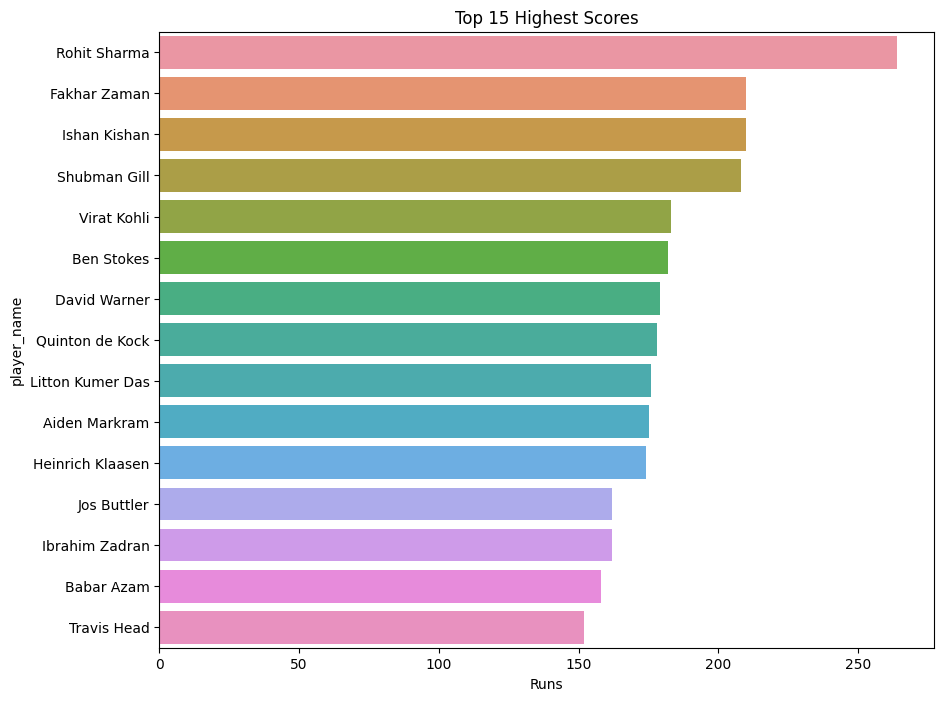

In [303]:
# Get top 15 highest scores
highest_scores.sort_values(by="Runs", ascending=False, inplace=True)
# Horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x="Runs", y="player_name", data=highest_scores[:15])
plt.title("Top 15 Highest Scores")
plt.show()

##### Feature Distribution

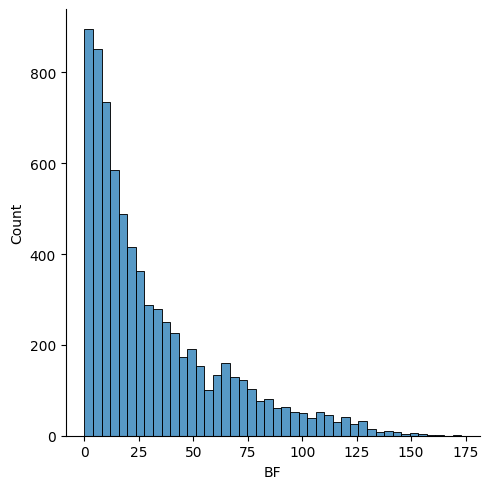

In [304]:
sns.displot(batting_df["BF"])

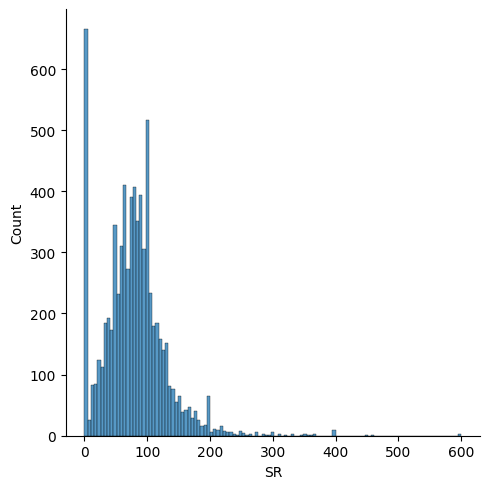

In [305]:
sns.displot(batting_df["SR"])

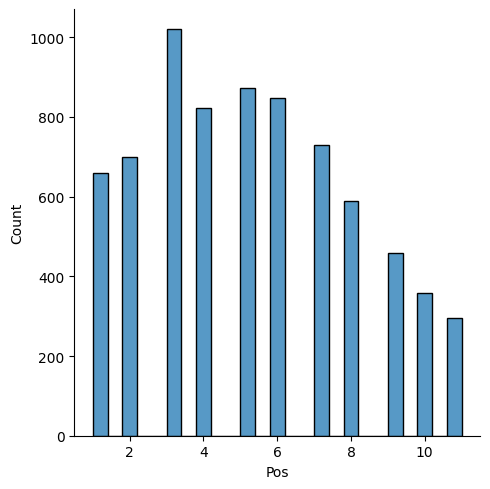

In [306]:
sns.displot(batting_df["Pos"])

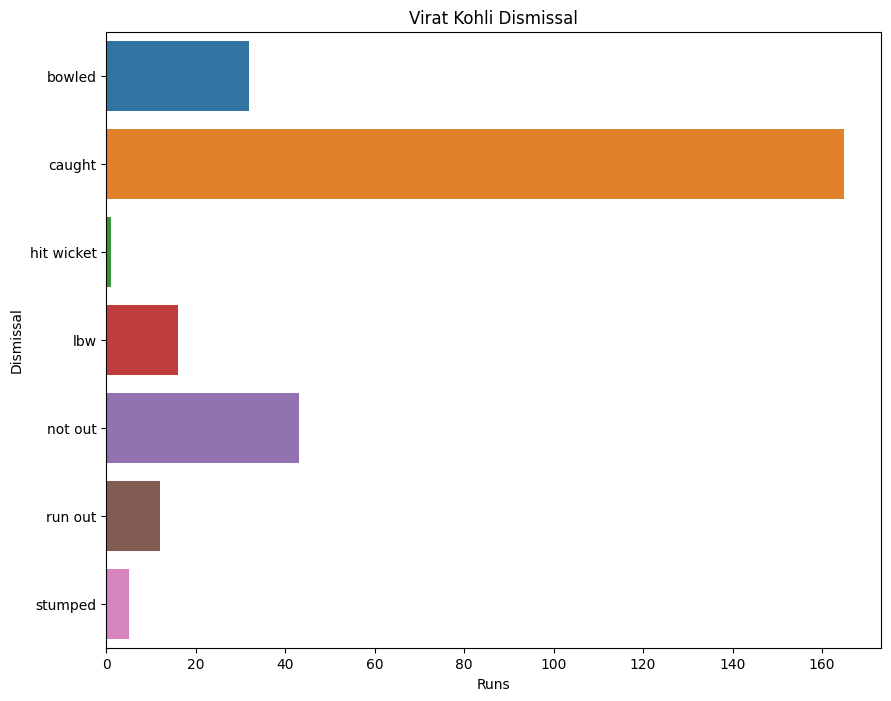

In [307]:
dismissal_df = (
    batting_df.groupby(["player_name", "Dismissal"])["Runs"].count().reset_index()
)
dismissal_df["Dismissal"] = dismissal_encoder.inverse_transform(
    dismissal_df["Dismissal"]
)

# Just Virat Kohli Dismissal
plt.figure(figsize=(10, 8))
sns.barplot(
    x="Runs",
    y="Dismissal",
    data=dismissal_df[dismissal_df["player_name"] == "Virat Kohli"],
)
plt.title("Virat Kohli Dismissal")
plt.show()

## Feature Selection

In [308]:
batting_df.columns

Index(['player_id', 'Runs', 'BF', '4s', '6s', 'SR', 'Pos', 'Dismissal', 'Inns',
       'Opposition', 'Ground', 'Start', 'team_name', 'player_name'],
      dtype='object')

<Axes: >

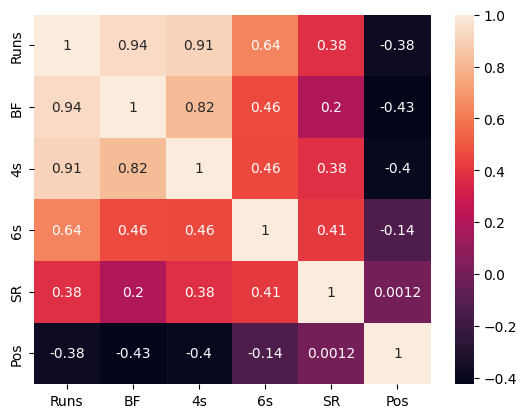

In [309]:
heatmap_df = batting_df[["Runs", "BF", "4s", "6s", "SR", "Pos", "Ground", "Opposition"]]
sns.heatmap(heatmap_df.corr(), annot=True)

Runs and Balls Faced are highly correlated. So, it has a greater impact on the model. Let's plot and see.

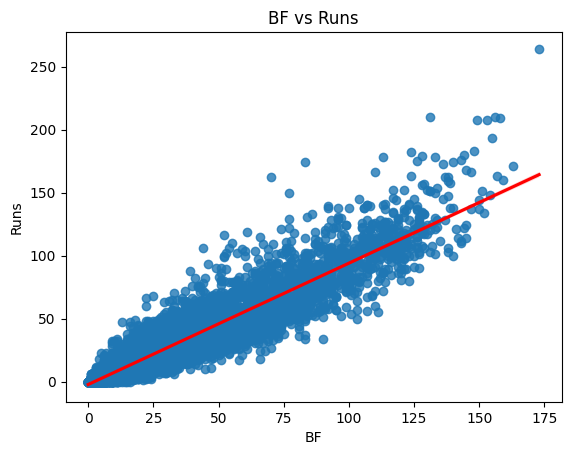

In [310]:
# Red regression line
sns.regplot(x="BF", y="Runs", data=batting_df, line_kws={"color": "red"})
plt.title("BF vs Runs")
plt.show()

#### One Hot Encoding

In [311]:
# Encoding team names with dummies. One hot encoding

dummy_encoded_bdf = pd.get_dummies(
    batting_df[["player_name", "Opposition", "Ground"]], prefix=""
).astype(int)
dummy_encoded_bdf.rename(columns=lambda x: re.sub(r"_v", "", x), inplace=True)
dummy_encoded_bdf.rename(columns=lambda y: re.sub(r"_", "", y), inplace=True)
dummy_encoded_bdf.astype(float)

,Abdul Rahman Rahmani,Abdullah Shafique,Adam Zampa,Adil Rashid,Aiden Markram,Alex Carey,Andile Phehlukwayo,Aryan Dutt,Azmatullah Omarzai,Babar Azam,...,The Oval,Thiruvananthapuram,Toronto,Townsville,Utrecht,Vadodara,Visakhapatnam,Wankhede,Wellington,Whangarei
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [312]:
bdf_copy = batting_df.copy()

In [313]:
merged_bdf = pd.concat([dummy_encoded_bdf, bdf_copy], axis="columns")
merged_bdf.describe()

,Abdul Rahman Rahmani,Abdullah Shafique,Adam Zampa,Adil Rashid,Aiden Markram,Alex Carey,Andile Phehlukwayo,Aryan Dutt,Azmatullah Omarzai,Babar Azam,...,Wellington,Whangarei,player_id,Runs,BF,4s,6s,SR,Pos,Dismissal
count,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,...,7351.000000,7351.000000,7.351000e+03,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000,7351.000000
mean,0.000408,0.001088,0.006122,0.008706,0.007754,0.008978,0.006666,0.003129,0.001632,0.014964,...,0.013468,0.000544,3.967865e+05,28.243096,31.678139,2.552442,0.541559,79.327902,5.253979,2.041627
std,0.020199,0.032973,0.078006,0.092907,0.087721,0.094334,0.081377,0.055852,0.040373,0.121417,...,0.115274,0.023322,2.705328e+05,32.010620,31.118406,3.256548,1.200626,50.557999,2.790967,1.988787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.656000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.472350e+05,5.000000,8.000000,0.000000,0.000000,50.000000,3.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.264340e+05,16.000000,21.000000,1.000000,0.000000,77.770000,5.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,5.339560e+05,41.000000,47.000000,4.000000,1.000000,100.000000,7.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.278252e+06,264.000000,173.000000,33.000000,16.000000,600.000000,11.000000,8.000000


In [314]:
final_df = merged_bdf.drop(["player_name", "Opposition"], axis="columns")
final_df

,Abdul Rahman Rahmani,Abdullah Shafique,Adam Zampa,Adil Rashid,Aiden Markram,Alex Carey,Andile Phehlukwayo,Aryan Dutt,Azmatullah Omarzai,Babar Azam,...,BF,4s,6s,SR,Pos,Dismissal,Inns,Ground,Start,team_name
0,0,0,0,0,0,0,0,0,0,0,...,3,0,0,0.00,3,1,2,Sharjah,2 Oct 2013,Afghanistan
1,0,0,0,0,0,0,0,0,0,0,...,19,0,0,68.42,5,4,2,Sharjah,4 Oct 2013,Afghanistan
2,0,0,0,0,0,0,0,0,0,0,...,67,4,0,56.71,4,4,2,Kuala Lumpur,1 May 2014,Afghanistan
3,0,0,0,0,0,0,0,0,0,0,...,7,0,0,42.85,4,3,1,Kuala Lumpur,2 May 2014,Afghanistan
4,0,0,0,0,0,0,0,0,0,0,...,22,2,0,68.18,4,1,1,Bulawayo,18 Jul 2014,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9321,0,0,0,0,0,0,0,0,0,0,...,2,1,0,200.00,11,4,2,Auckland,25 Mar 2023,Sri Lanka
9322,0,0,0,0,0,0,0,0,0,0,...,5,0,0,20.00,11,4,1,Bulawayo,30 Jun 2023,Sri Lanka
9325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.00,11,4,1,Harare,9 Jul 2023,Sri Lanka
9326,0,0,0,0,0,0,0,0,0,0,...,2,1,0,200.00,11,4,2,Delhi,7 Oct 2023,Sri Lanka


## Model Building

In [315]:
model_dict = {}

In [316]:
player_df = final_df[["Virat Kohli", "Australia", "Runs", "BF", "Bengaluru", "SR"]]
player_df

,Virat Kohli,Australia,Runs,BF,Bengaluru,SR
0,0,0,0,3,0,0.00
1,0,0,13,19,0,68.42
2,0,0,38,67,0,56.71
3,0,0,3,7,0,42.85
4,0,0,15,22,0,68.18
...,...,...,...,...,...,...
9321,0,0,4,2,0,200.00
9322,0,0,1,5,0,20.00
9325,0,0,0,0,0,0.00
9326,0,0,4,2,0,200.00


In [317]:
X = player_df.drop(["Runs"], axis="columns")
y = player_df["Runs"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

#### Linear Regression

In [318]:
model = LinearRegression()
model.fit(X_train, y_train)
model_dict["LinearRegression"] = model.score(X_test, y_test)
model.score(X_test, y_test)

0.9137917104675111

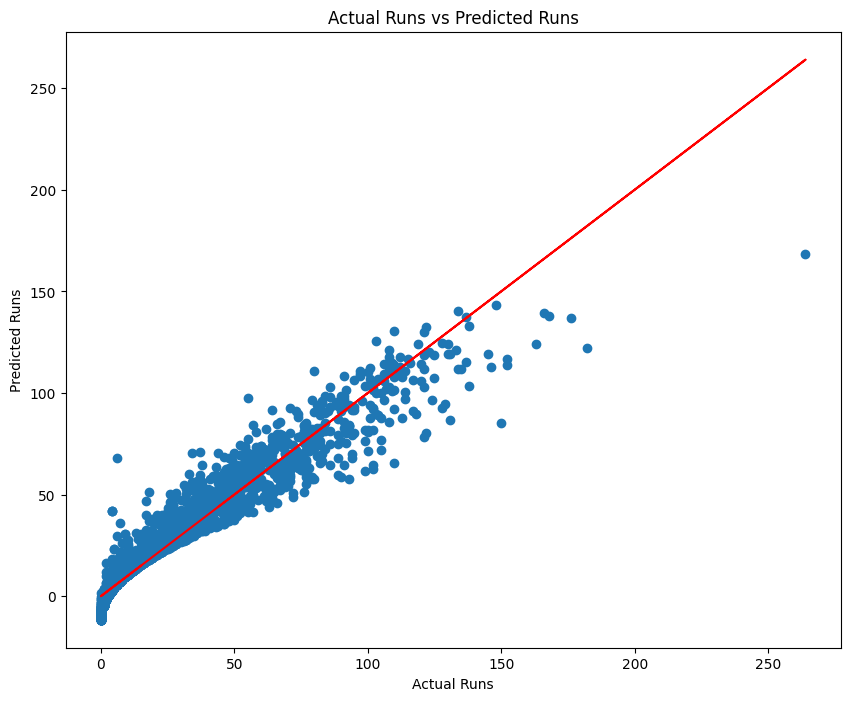

In [319]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Actual Runs vs Predicted Runs")
plt.show()

#### Bayesian Regression

In [320]:
model = BayesianRidge()
model.fit(X_train, y_train)
model_dict["BayesianRidge"] = model.score(X_test, y_test)
model.score(X_test, y_test)

0.9138397975994834

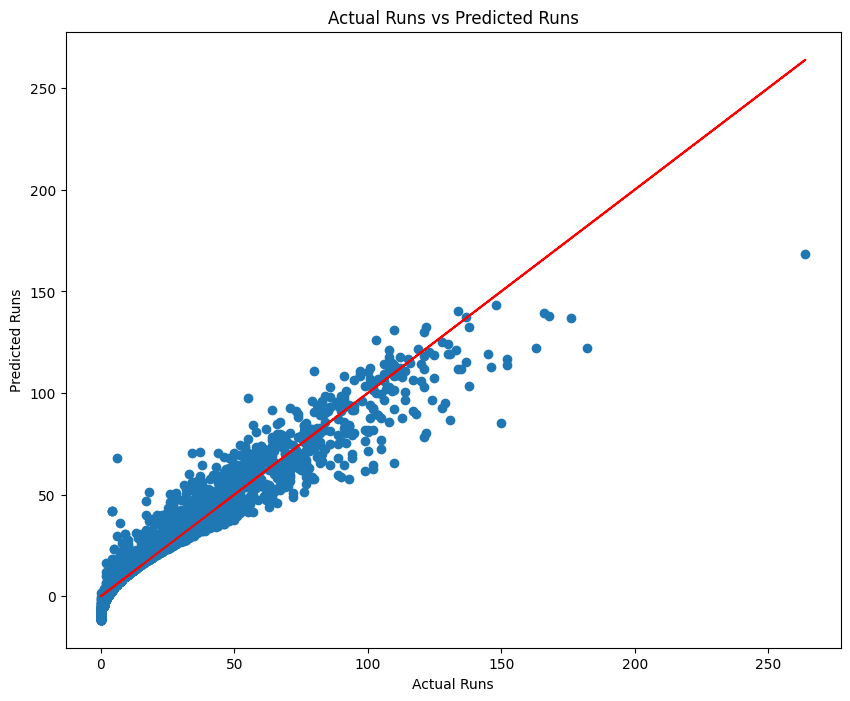

In [321]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Actual Runs vs Predicted Runs")
plt.show()

#### KNN Regression

In [322]:
# KNN
model = KNeighborsRegressor()
model.fit(X_train, y_train)
model_dict['KNeighborsRegressor'] = model.score(X_test, y_test)
model.score(X_test, y_test)

0.9962498070523131

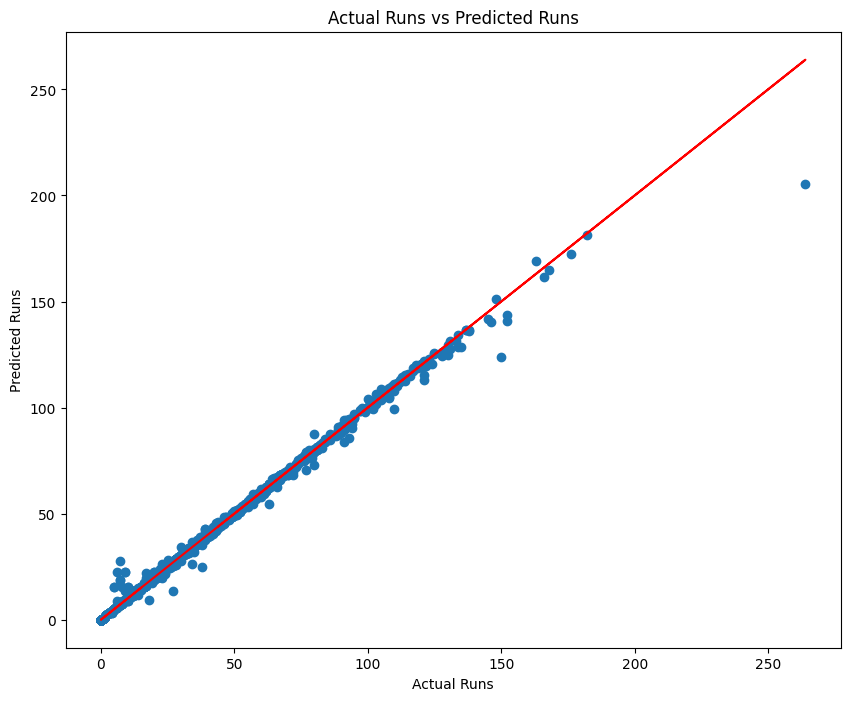

In [323]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Actual Runs vs Predicted Runs")
plt.show()

#### Gaussian Process Regression

In [324]:
# Gaussian Processes

model = GaussianProcessRegressor()
model.fit(X_train, y_train)
model_dict["GaussianProcessRegressor"] = model.score(X_test, y_test)
model.score(X_test, y_test)

0.29571554618793416

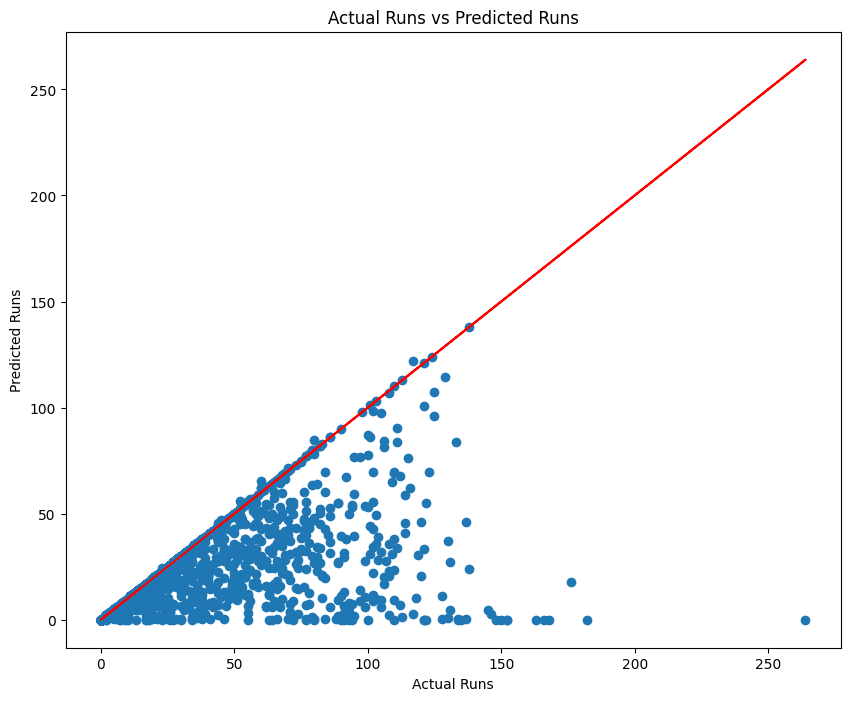

In [325]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Actual Runs vs Predicted Runs")
plt.show()

#### Decision Tree Regression

In [326]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9952463294978486

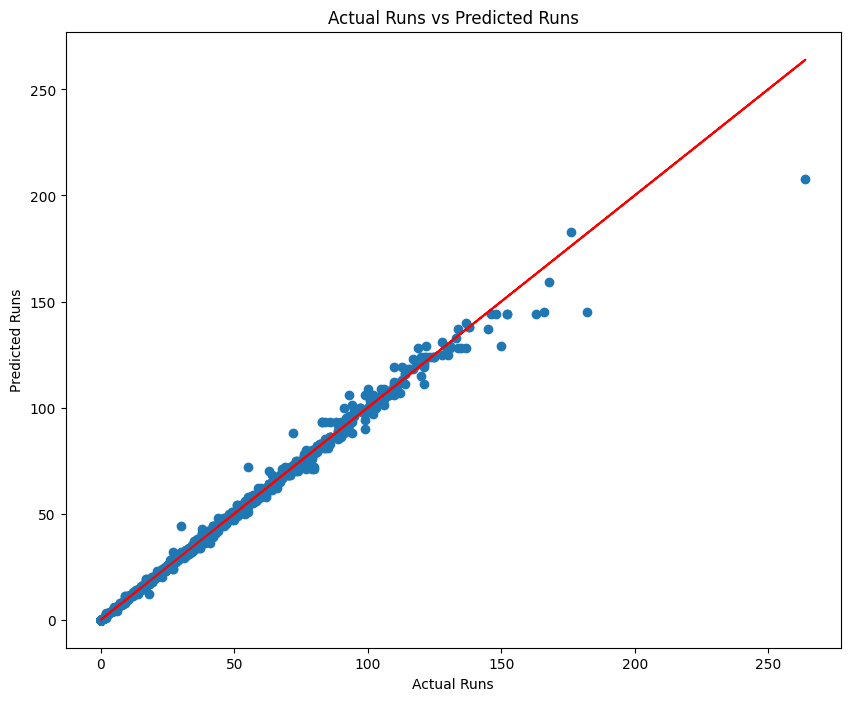

In [327]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Actual Runs vs Predicted Runs")
plt.show()

### Ensemble Methods

#### Gradient Boosting Regression

In [328]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
model_dict["GradientBoostingRegressor"] = model.score(X_test, y_test)
model.score(X_test, y_test)

0.9966964588436605

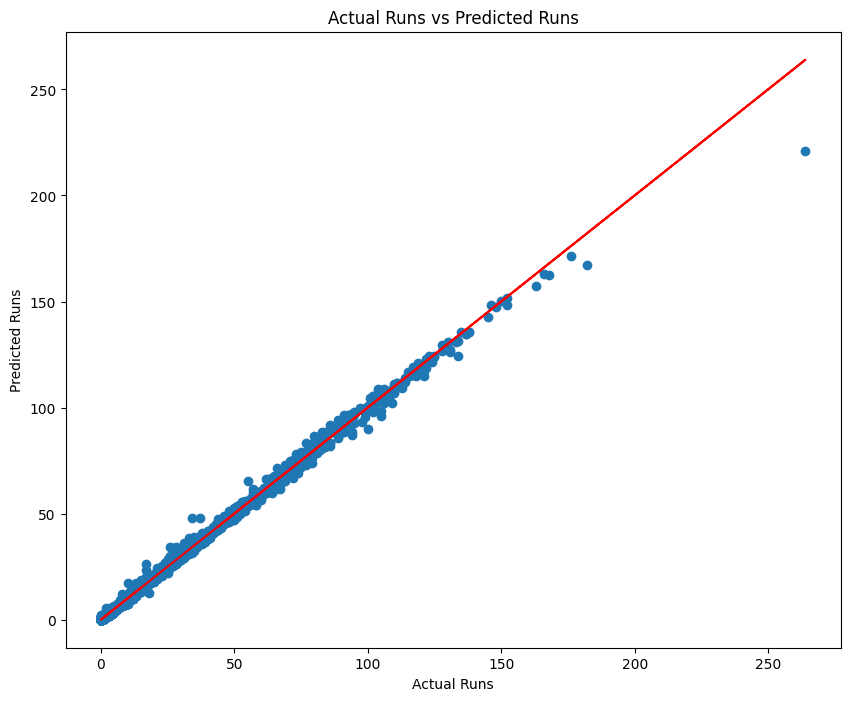

In [329]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Actual Runs vs Predicted Runs")
plt.show()

#### Ada Boost Regression

In [330]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)
model_dict["AdaBoostRegressor"] = model.score(X_test, y_test)
model.score(X_test, y_test)

0.9306439539623951

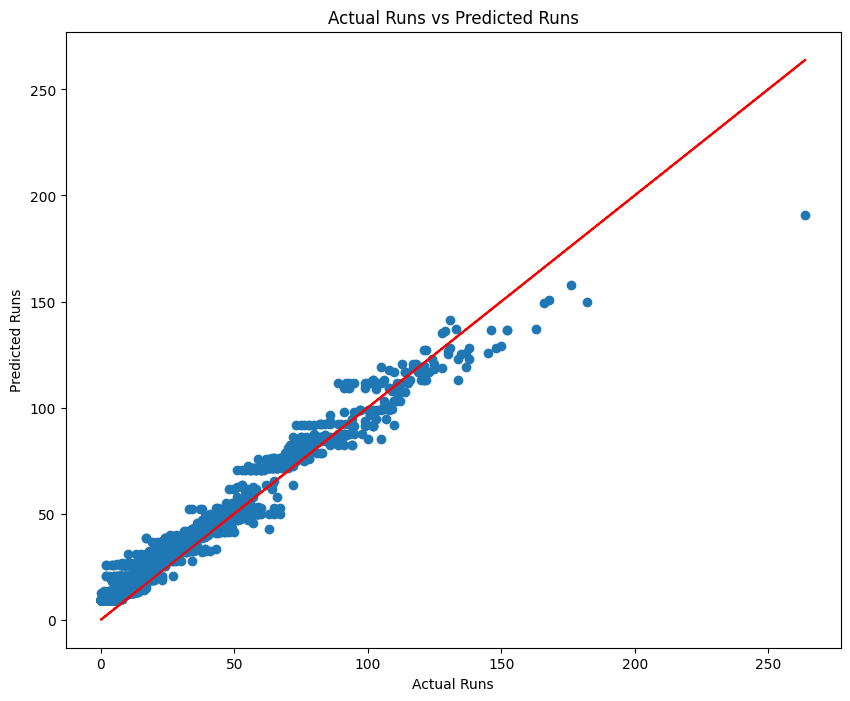

In [331]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Actual Runs vs Predicted Runs")
plt.show()

#### Bagging Regression

In [332]:
model = BaggingRegressor()
model.fit(X_train, y_train)
model_dict["BaggingRegressor"] = model.score(X_test, y_test)
model.score(X_test, y_test)

0.9976623067129937

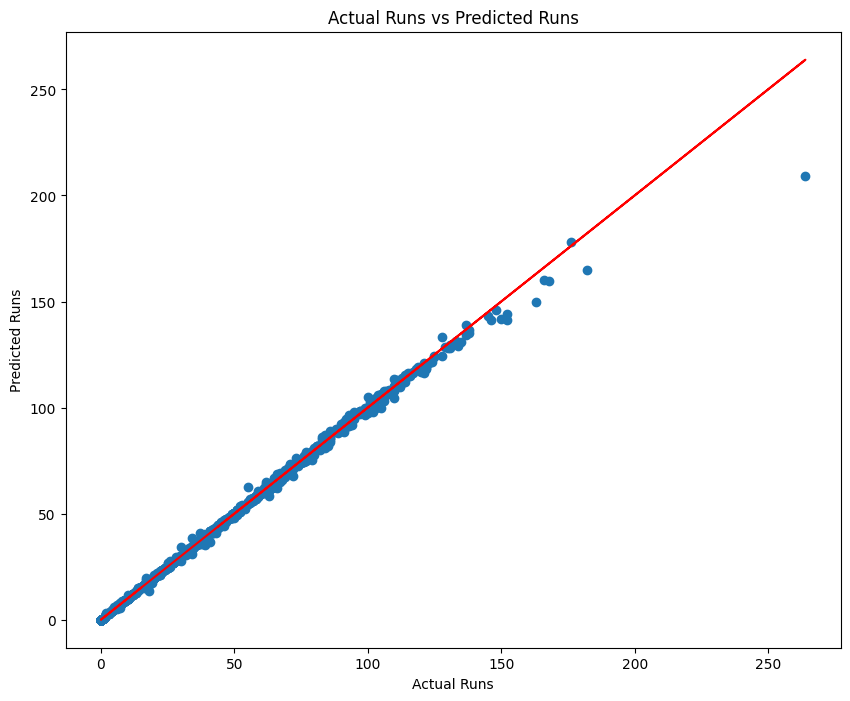

In [333]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Actual Runs vs Predicted Runs")
plt.show()

#### Random Forest Regression

In [334]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9978081464283165

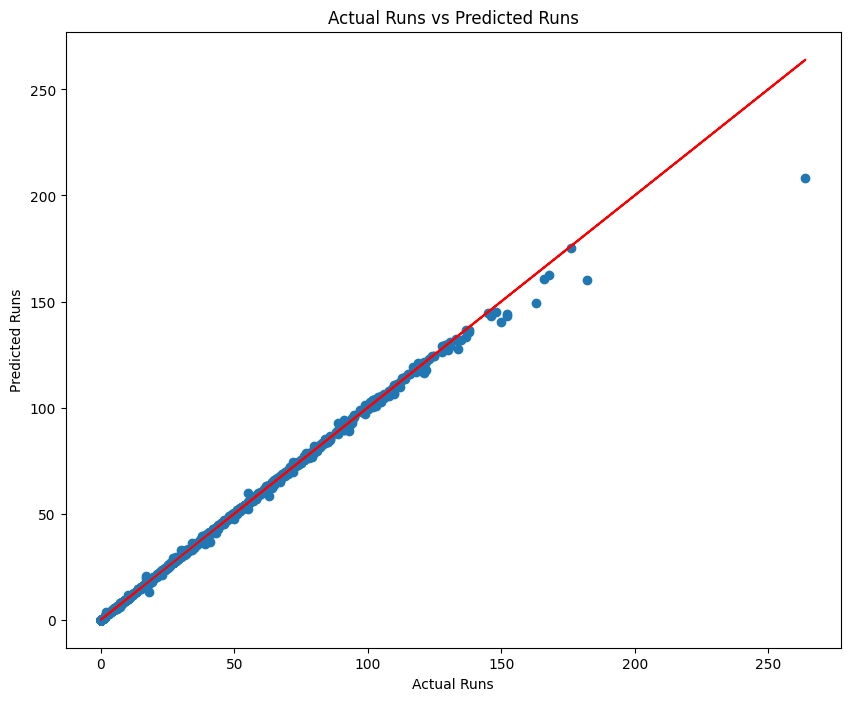

In [335]:
y_pred = model.predict(X_test)

# plot the predicted values along with the actual values
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, "r")
plt.xlabel("Actual Runs")
plt.ylabel("Predicted Runs")
plt.title("Actual Runs vs Predicted Runs")
plt.show()

In [336]:
model_dict

{'LinearRegression': 0.9137917104675111,
 'BayesianRidge': 0.9138397975994834,
 'KNeighborsRegressor': 0.9962498070523131,
 'GaussianProcessRegressor': 0.29571554618793416,
 'GradientBoostingRegressor': 0.9966964588436605,
 'AdaBoostRegressor': 0.9306439539623951,
 'BaggingRegressor': 0.9976623067129937}

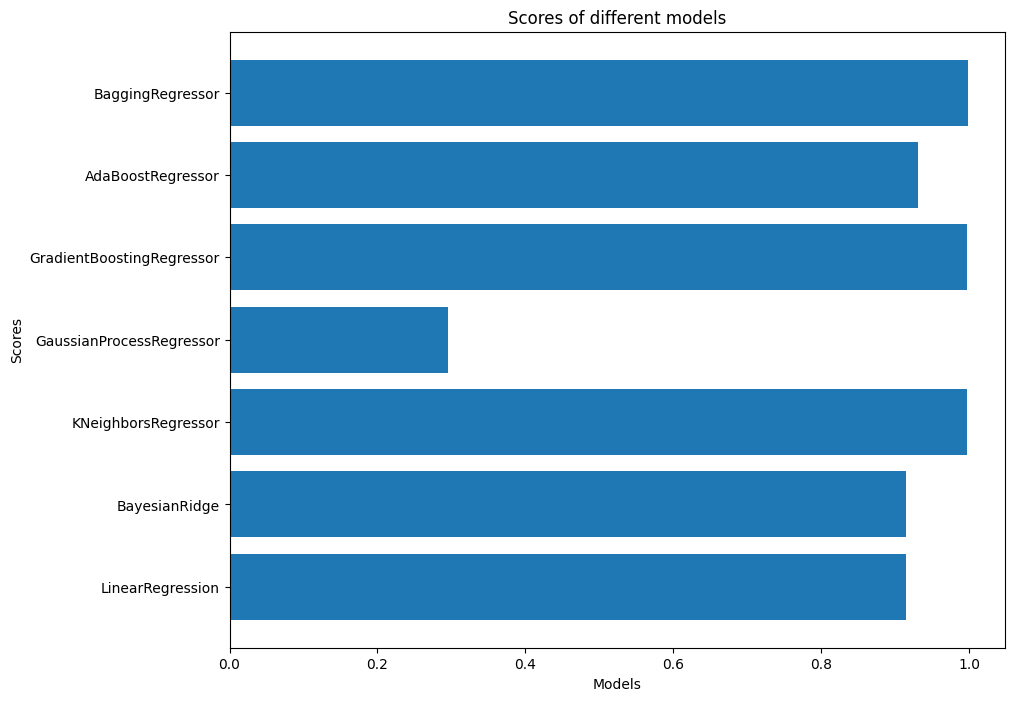

In [337]:
# Plotting the scores
plt.figure(figsize=(10, 8))
plt.barh(list(model_dict.keys()), list(model_dict.values()))
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Scores of different models")
plt.show()

#### Generalizing

In [338]:
def build_model(player_name, opposition_team, ground_name):
    player_df = final_df[
        [player_name, opposition_team, "Runs", "BF", "Inns", ground_name, "SR"]
    ]

    X = player_df.drop(["Runs"], axis="columns")
    y = player_df["Runs"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    model_dict["LinearRegression"] = {
        "model": linear_model,
        "score": linear_model.score(X_test, y_test),
    }

    # Bayesian Ridge
    bayesian_model = BayesianRidge()
    bayesian_model.fit(X_train, y_train)
    model_dict["BayesianRidge"] = {
        "model": bayesian_model,
        "score": bayesian_model.score(X_test, y_test),
    }

    # KNN
    knn_model = KNeighborsRegressor()
    knn_model.fit(X_train, y_train)
    model_dict["KNeighborsRegressor"] = {
        "model": knn_model,
        "score": knn_model.score(X_test, y_test),
    }

    # Gaussian Processes
    gaussian_model = GaussianProcessRegressor()
    gaussian_model.fit(X_train, y_train)
    model_dict["GaussianProcessRegressor"] = {
        "model": gaussian_model,
        "score": gaussian_model.score(X_test, y_test),
    }

    # Decision Tree
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train, y_train)
    model_dict["DecisionTreeRegressor"] = {
        "model": dt_model,
        "score": dt_model.score(X_test, y_test),
    }

    # Gradient Boosting
    gb_model = GradientBoostingRegressor()
    gb_model.fit(X_train, y_train)
    model_dict["GradientBoostingRegressor"] = {
        "model": gb_model,
        "score": gb_model.score(X_test, y_test),
    }

    # AdaBoost
    ada_model = AdaBoostRegressor()
    ada_model.fit(X_train, y_train)
    model_dict["AdaBoostRegressor"] = {
        "model": ada_model,
        "score": ada_model.score(X_test, y_test),
    }

    # Bagging
    bagging_model = BaggingRegressor()
    bagging_model.fit(X_train, y_train)
    model_dict["BaggingRegressor"] = {
        "model": bagging_model,
        "score": bagging_model.score(X_test, y_test),
    }

    # Random Forest
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    model_dict["RandomForestRegressor"] = {
        "model": rf_model,
        "score": rf_model.score(X_test, y_test),
    }


    best_model = max(model_dict, key=lambda k: model_dict[k]["score"])
    best_model = model_dict[best_model]["model"]

    return model_dict, best_model, X_train, X_test, y_train, y_test, player_df



In [339]:
model_dict, best_model, X_train, X_test, y_train, y_test, player_df = build_model("Virat Kohli", "Australia", "Bengaluru")


y_pred = best_model.predict(X_test)
print("The Best Model is: ", best_model)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

The Best Model is:  RandomForestRegressor()
Mean Squared Error:  2.4808515865820486
Mean Absolute Error:  0.29993653671804177
R2 Score:  0.9974896957850325


In [340]:
def predict_runs(player_name, opposition_name, ground_name, career_sr):
    try:
        model_dict, best_model, X_train, X_test, y_train, y_test, player_df = build_model(player_name, opposition_name, ground_name)

        
        career_BF_avg = max(player_df["BF"].mean() + random.randint(-40, 70), player_df["BF"].mean())
        # career_6s_avg = player_df["6s"].mean()
        # career_4s_avg = player_df["4s"].mean()

        pred_runs = best_model.predict([[1, 1, career_BF_avg, 1, 1, career_sr]])

        return int(pred_runs[0])
    
    except:
        return -1


In [341]:
career_data_df = pd.read_csv("final_data/player_{team_name_id_role}_with_career_summary_batting.csv")
career_data_df

# Remove NaN
career_data_df.dropna(inplace=True)
career_data_df

,team_name,player_name,player_id,player_role,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,Afghanistan,Hashmatullah Shahidi,440970,Top order Batter,2013-2023,70,70,11,2001,97*,33.91,2962,67.55,0,18,5,173,12
1,Afghanistan,Rahmanullah Gurbaz,974087,Wicketkeeper Batter,2021-2023,32,32,1,1182,151,38.12,1349,87.62,5,4,1,107,44
2,Afghanistan,Ibrahim Zadran,921509,Opening Batter,2019-2023,25,25,2,1123,162,48.82,1366,82.21,4,5,2,119,15
3,Afghanistan,Reyaz Hassan,1061090,Batter,2022-2023,5,4,0,120,50,30.00,192,62.50,0,1,0,12,2
4,Afghanistan,Rahmat Shah Zurmati,533956,Allrounder,2013-2023,103,99,4,3481,114,36.64,4902,71.01,5,25,5,300,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Sri Lanka,Charith Asalanka,784367,Batting Allrounder,2021-2023,47,41,5,1443,110,40.08,1626,88.74,1,10,2,116,28
142,Sri Lanka,Dhananjaya de Silva,465793,Allrounder,2016-2023,88,80,10,1812,93,25.88,2313,78.33,0,10,4,180,15
144,Sri Lanka,Maheesh Theekshana,1138316,Bowler,2021-2023,32,17,6,149,29,13.54,252,59.12,0,0,4,8,2
146,Sri Lanka,Kasun Rajitha,499594,Bowler,2018-2023,32,17,7,103,33,10.30,165,62.42,0,0,3,12,1


In [342]:
# Predict for all Indian players. Use BF, 4s, 6s, SR from career data. Avg them with Mat

# Get all Indian players
players_df = career_data_df[career_data_df["team_name"] == "India"]
players_df

,team_name,player_name,player_id,player_role,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
60,India,Rohit Sharma,34102,Top order Batter,2007-2023,257,249,36,10510,264,49.34,11504,91.35,31,54,16,971,312
61,India,Hardik Pandya,625371,Allrounder,2016-2023,86,61,9,1769,92*,34.01,1603,110.35,0,11,4,132,67
62,India,Shubman Gill,1070173,Opening Batter,2019-2023,39,39,6,2021,208,61.24,1974,102.38,6,10,1,228,42
63,India,Virat Kohli,253802,Top order Batter,2008-2023,287,275,43,13437,183,57.91,14350,93.63,48,69,16,1255,148
64,India,Shreyas Iyer,642519,Top order Batter,2017-2023,53,48,5,1935,113*,45.00,1998,96.84,3,15,1,188,40
65,India,KL Rahul,422108,Wicketkeeper Batter,2016-2023,67,63,13,2507,112,50.14,2885,86.89,6,16,2,196,55
66,India,Ravindra Jadeja,234675,Allrounder,2009-2023,192,129,46,2683,87,32.32,3179,84.39,0,13,6,195,52
67,India,Ravichandran Ashwin,26421,Bowling Allrounder,2010-2023,116,63,20,707,65,16.44,813,86.96,0,1,6,60,7
68,India,Shardul Thakur,475281,Bowler,2017-2023,47,25,6,329,50*,17.31,313,105.11,0,1,1,31,9
69,India,Jasprit Bumrah,625383,Bowler,2016-2023,84,24,13,89,16,8.09,155,57.41,0,0,5,10,1


In [343]:
career_data_df['player_role'].unique()

array(['Top order Batter', 'Wicketkeeper Batter', 'Opening Batter',
       'Batter', 'Allrounder', 'Middle order Batter',
       'Bowling Allrounder', 'Bowler', 'Batting Allrounder'], dtype=object)

In [344]:
players_df['player_role'].unique()

array(['Top order Batter', 'Allrounder', 'Opening Batter',
       'Wicketkeeper Batter', 'Bowling Allrounder', 'Bowler', 'Batter'],
      dtype=object)

# Conclusion

In [345]:
for row in players_df.iterrows():
    if row[1]["player_role"] == "Bowling Allrounder" or row[1]['player_role'] == "Bowler":
        continue
    player_name = row[1]["player_name"]
    team_name = row[1]["team_name"]
    opposition_name = "Sri Lanka"
    ground_name = "Ahmedabad"
    career_sr = row[1]["SR"]
    pred_runs = predict_runs(player_name, opposition_name, ground_name, career_sr)
    print(player_name, ":", pred_runs)

Rohit Sharma : 29
Hardik Pandya : 52
Shubman Gill : 33
Virat Kohli : 47
Shreyas Iyer : 45
KL Rahul : 74
Ravindra Jadeja : 59
Ishan Kishan : 56
Surya Kumar Yadav : 33


In [346]:
model_dict, best_model, X_train, X_test, y_train, y_test, player_df = build_model("Virat Kohli", "Australia", "Bengaluru")


model_scores_df = pd.DataFrame(model_dict)
model_scores_df.drop(["model"], inplace=True)
model_scores_df = model_scores_df.T
model_scores_df.sort_values(by="score", ascending=False, inplace=True)
model_scores_df

,score
RandomForestRegressor,0.995822
GradientBoostingRegressor,0.995735
BaggingRegressor,0.995135
DecisionTreeRegressor,0.994581
KNeighborsRegressor,0.994141
AdaBoostRegressor,0.942752
BayesianRidge,0.911091
LinearRegression,0.911047
GaussianProcessRegressor,0.144551


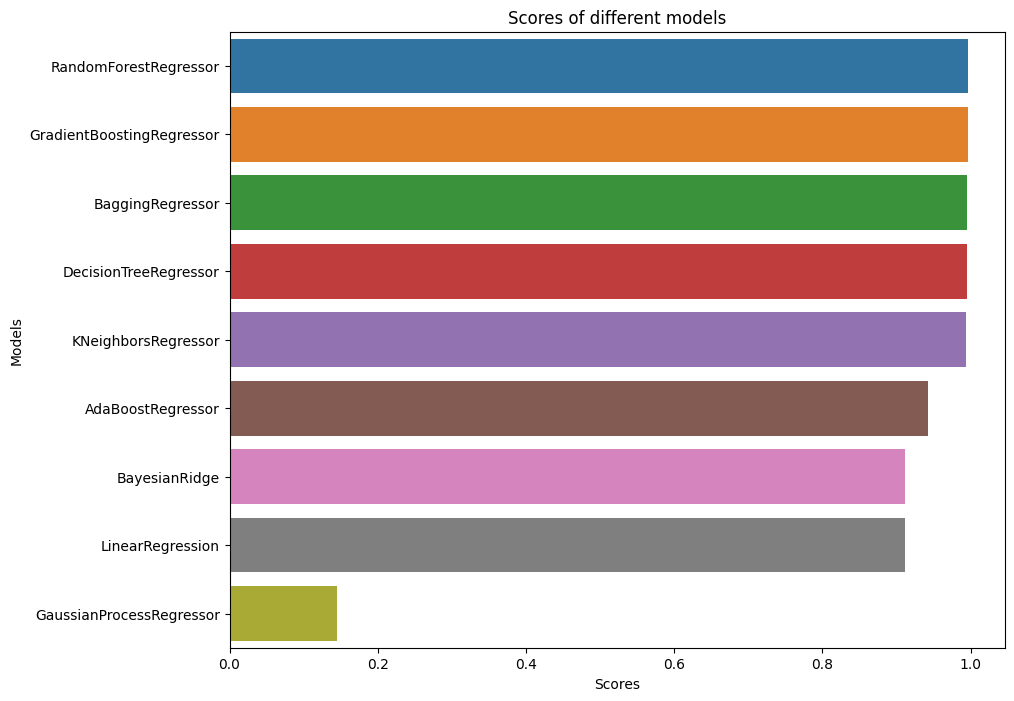

In [347]:
# Plotting the scores Horizontal bar plot

plt.figure(figsize=(10, 8))
sns.barplot(x=model_scores_df["score"], y=model_scores_df.index)
plt.xlabel("Scores")
plt.ylabel("Models")
plt.title("Scores of different models")
plt.show()

# Inference

The Ensemble methods performed the best with `99.7%` accuracy, whereas the Gaussian Process Regression the worst with `14%` accuracy clearly indicating it's not an apt choice!